In [58]:
# Import necessary libraries
import pandas as pd
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import top_k_accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('data/data.csv', sep=',')

In [6]:
#df has strings, turn everything lowercase
df = df.apply(lambda x: x.astype(str).str.lower())
print(df)

        angles      catala    espanyol    alemany    frances    polones  \
0           as         com        como        wie      comme        jak   
1          his        seva          su      seine    le sien       jego   
2         that         que         que        das         ce         że   
3           he         ell          él         er         il         on   
4          was         era      estaba        war      a été        był   
..         ...         ...         ...        ...        ...        ...   
983       nose         nas       nariz       nase        nez        nos   
984     plural      plural      plural    plural-    pluriel      mnogi   
985      anger      còlera      enfado        wut     colère      gniew   
986      claim  reclamació    reclamar      klage   réclamer      prawo   
987  continent   continent  continente  kontinent  continent  kontynent   

      portugues      romanes      italia     suec  
0          como    la fel de        come     ka

In [7]:
# angles	catala	espanyol	alemany	frances	polones	portugues	romanes	italia	suec

# for every column in df create new a new df 

ang = pd.DataFrame(df['angles'])
ang['lang'] = 'ang'
ang = ang.rename(columns={'angles': 'word'})

cat = pd.DataFrame(df['catala'])
cat['lang'] = 'cat'
cat = cat.rename(columns={'catala': 'word'})

esp = pd.DataFrame(df['espanyol'])
esp['lang'] = 'esp'
esp = esp.rename(columns={'espanyol': 'word'})

ale = pd.DataFrame(df['alemany'])
ale['lang'] = 'ale'
ale = ale.rename(columns={'alemany': 'word'})

fra = pd.DataFrame(df['frances'])
fra['lang'] = 'fra'
fra = fra.rename(columns={'frances': 'word'})

pol = pd.DataFrame(df['polones'])
pol['lang'] = 'pol'
pol = pol.rename(columns={'polones': 'word'})

por = pd.DataFrame(df['portugues'])
por['lang'] = 'por'
por = por.rename(columns={'portugues': 'word'})

rum = pd.DataFrame(df['romanes'])
rum['lang'] = 'rum'
rum = rum.rename(columns={'romanes': 'word'})

ita = pd.DataFrame(df['italia'])
ita['lang'] = 'ita'
ita = ita.rename(columns={'italia': 'word'})

sue = pd.DataFrame(df['suec'])
sue['lang'] = 'sue'
sue = sue.rename(columns={'suec': 'word'})

df2 = pd.concat([ang, cat, esp, ale, fra, pol, por, rum, ita, sue], ignore_index=True)

## Feature Engineering

In [8]:
def count_special_characters(word: str, string: str) -> int:
    num_special_characters=0
    for char in word:
        if char in string:
            num_special_characters+=1
    return num_special_characters

In [9]:
# Lenght
df2['len'] = df2['word'].str.len()

dict = {'vow':'aeiouAEIOU', 'acc':'àèìòùÀÈÌÒÙáéíóúÁÉÍÓÚ', 'accl':'àèìòùÀÈÌÒÙ', 'accr':'áéíóúÁÉÍÓÚ', 'die':'äëïöüÄËÏÖÜ',
        'cir':'âêîôûÂÊÎÔÛ', 'ñ':'ñÑ', 'ç':'çÇ', 'ale': 'ß', 'pol': 'ąćęłńóśźżĄĆĘŁŃÓŚŹŻ', 'por': 'ãõÃÕ', 'rum': 'ăâîșțĂÂÎȘȚ'}
for column in dict:
        df2[column] = df2['word'].apply(lambda row: count_special_characters(row, dict[column]))

In [10]:
df2

,word,lang,len,vow,acc,accl,accr,die,cir,ñ,ç,ale,pol,por,rum
0,as,ang,2,1,0,0,0,0,0,0,0,0,0,0,0
1,his,ang,3,1,0,0,0,0,0,0,0,0,0,0,0
2,that,ang,4,1,0,0,0,0,0,0,0,0,0,0,0
3,he,ang,2,1,0,0,0,0,0,0,0,0,0,0,0
4,was,ang,3,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9875,pua,sue,3,2,0,0,0,0,0,0,0,0,0,0,0
9876,wingi,sue,5,2,0,0,0,0,0,0,0,0,0,0,0
9877,hasira,sue,6,3,0,0,0,0,0,0,0,0,0,0,0
9878,madai,sue,5,3,0,0,0,0,0,0,0,0,0,0,0


In [30]:
X = df2[['len', 'vow', 'acc', 'accl', 'accr', 'die', 'cir', 'ñ', 'ç', 'ale', 'pol', 'por', 'rum']]
y = df2['lang']

# Use PCA to reduce the dimensionality of the data
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X)

# Split the data into training, testing and validation sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2)

# Define the SVM model
model1 = svm.SVC(kernel='linear', probability=True)  # linear kernel
model2 = svm.SVC(kernel='poly', degree=3, probability=True)  # polynomial kernel with degree 3
model3 = svm.SVC(kernel='rbf', gamma=0.1, probability=True)  # RBF kernel with gamma = 0.1

model1_pca = svm.SVC(kernel='linear', probability=True)  # linear kernel
model2_pca = svm.SVC(kernel='poly', degree=3, probability=True)  # polynomial kernel with degree 3
model3_pca = svm.SVC(kernel='rbf', gamma=0.1, probability=True)  # RBF kernel with gamma = 0.1


In [31]:
# Train the models on the training data
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

model1_pca.fit(X_train_pca, y_train_pca)
model2_pca.fit(X_train_pca, y_train_pca)
model3_pca.fit(X_train_pca, y_train_pca)

SVC(gamma=0.1, probability=True)

In [49]:
# Evaluate the models on the test data
score1 = model1.score(X_test, y_test)
score2 = model2.score(X_test, y_test)
score3 = model3.score(X_test, y_test)
print(f'Model 1 accuracy: {score1 * 100}%')
print(f'Model 2 accuracy: {score2 * 100}%')
print(f'Model 3 accuracy: {score3 * 100}%\n')

# Evaluate the models on the test data
score1_pca = model1_pca.score(X_test_pca, y_test_pca)
score2_pca = model2_pca.score(X_test_pca, y_test_pca)
score3_pca = model3_pca.score(X_test_pca, y_test_pca)
print(f'Model 1 pca accuracy: {score1_pca * 100}%')
print(f'Model 2 pca accuracy: {score2_pca * 100}%')
print(f'Model 3 pca accuracy: {score3_pca * 100}%')

Model 1 accuracy: 29.251012145748987%
Model 2 accuracy: 26.26518218623482%
Model 3 accuracy: 29.048582995951417%

Model 1 pca accuracy: 27.58097165991903%
Model 2 pca accuracy: 23.279352226720647%
Model 3 pca accuracy: 27.226720647773277%


In [33]:
# Use the trained models to make predictions
predictions1 = model1.predict_proba(X_test)
predictions2 = model2.predict_proba(X_test)
predictions3 = model3.predict_proba(X_test)

predictions1_pca = model1_pca.predict_proba(X_test_pca)
predictions2_pca = model2_pca.predict_proba(X_test_pca)
predictions3_pca = model3_pca.predict_proba(X_test_pca)

In [53]:
print('Top 3 accuracy model 1 %f' % top_k_accuracy_score(y_test, predictions1, k=3))
print('Top 3 accuracy model 2 %f' % top_k_accuracy_score(y_test, predictions2, k=3))
print('Top 3 accuracy model 3 %f\n' % top_k_accuracy_score(y_test, predictions3, k=3))

print('accuracy model 1 pca %f' % top_k_accuracy_score(y_test_pca, predictions1_pca, k=3))
print('Top 3 accuracy model 2 pca %f' % top_k_accuracy_score(y_test_pca, predictions2_pca, k=3))
print('Top 3 accuracy model 3 pca %f' % top_k_accuracy_score(y_test_pca, predictions3_pca, k=3))



Top 3 accuracy model 1 0.551619
Top 3 accuracy model 2 0.537955
Top 3 accuracy model 3 0.563765

accuracy model 1 pca 0.527834
Top 3 accuracy model 2 pca 0.496457
Top 3 accuracy model 3 pca 0.548583


In [48]:
# Generate classification reports for the models
print(classification_report(y_test, model1.predict(X_test), zero_division=0))
print(classification_report(y_test, model2.predict(X_test), zero_division=0))
print(classification_report(y_test, model3.predict(X_test), zero_division=0))

print(classification_report(y_test_pca, model1_pca.predict(X_test_pca), zero_division=0))
print(classification_report(y_test_pca, model2_pca.predict(X_test_pca), zero_division=0))
print(classification_report(y_test_pca, model3_pca.predict(X_test_pca), zero_division=0))

              precision    recall  f1-score   support

         ale       0.22      0.41      0.28       180
         ang       0.21      0.49      0.30       217
         cat       0.67      0.07      0.13       199
         esp       0.43      0.07      0.12       186
         fra       0.55      0.15      0.23       195
         ita       0.23      0.38      0.29       190
         pol       0.94      0.43      0.58       207
         por       0.75      0.06      0.11       193
         rum       0.97      0.29      0.44       206
         sue       0.20      0.54      0.29       203

    accuracy                           0.29      1976
   macro avg       0.52      0.29      0.28      1976
weighted avg       0.52      0.29      0.28      1976

              precision    recall  f1-score   support

         ale       0.24      0.26      0.25       180
         ang       0.19      0.81      0.30       217
         cat       0.16      0.12      0.13       199
         esp       0.43 

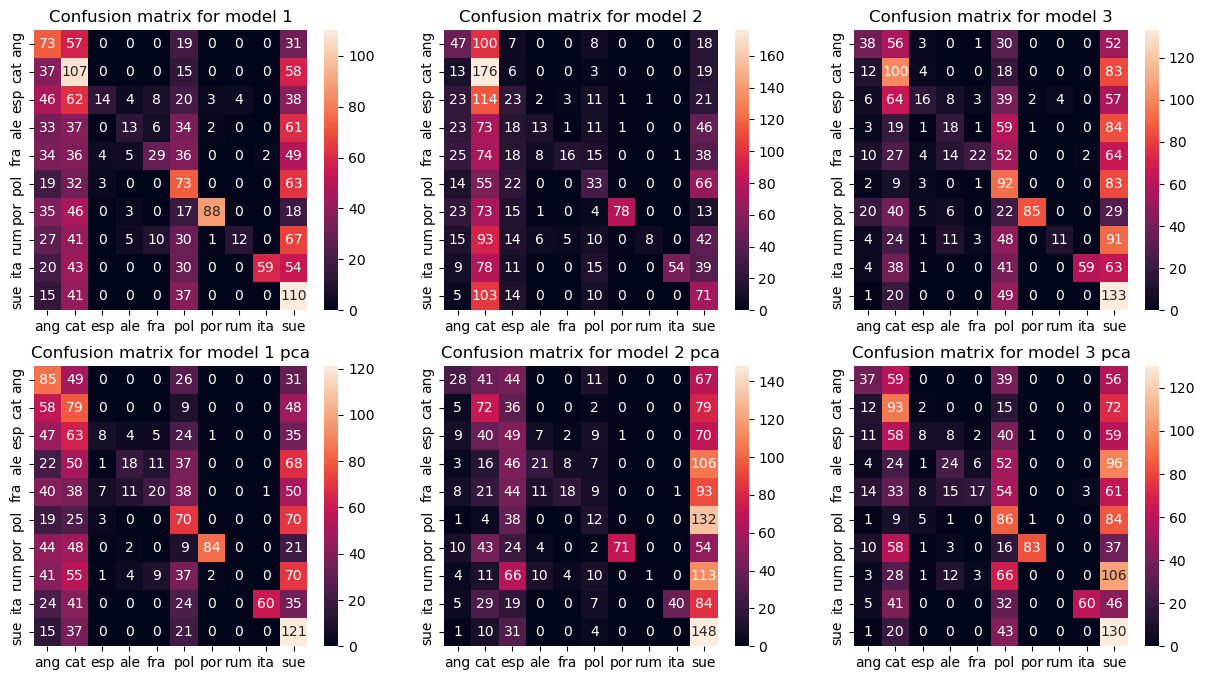

In [67]:
# Generate confusion matrices for the models and plot them as heatmaps try to make them look pretty,you can use seaborn for this
cm1 = confusion_matrix(y_test, model1.predict(X_test))
cm2 = confusion_matrix(y_test, model2.predict(X_test))
cm3 = confusion_matrix(y_test, model3.predict(X_test))

cm1_pca = confusion_matrix(y_test_pca, model1_pca.predict(X_test_pca))
cm2_pca = confusion_matrix(y_test_pca, model2_pca.predict(X_test_pca))
cm3_pca = confusion_matrix(y_test_pca, model3_pca.predict(X_test_pca))

# Plot the confusion matrices
langs =["ang", "cat", "esp", "ale", "fra", "pol", "por", "rum", "ita", "sue"]
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

sns.heatmap(cm1, annot=True, ax=ax[0][0], fmt='d', xticklabels=langs, yticklabels=langs)
sns.heatmap(cm2, annot=True, ax=ax[0][1], fmt='d', xticklabels=langs, yticklabels=langs)
sns.heatmap(cm3, annot=True, ax=ax[0][2], fmt='d', xticklabels=langs, yticklabels=langs)

sns.heatmap(cm1_pca, annot=True, ax=ax[1][0], fmt='d', xticklabels=langs, yticklabels=langs)
sns.heatmap(cm2_pca, annot=True, ax=ax[1][1], fmt='d', xticklabels=langs, yticklabels=langs)
sns.heatmap(cm3_pca, annot=True, ax=ax[1][2], fmt='d', xticklabels=langs, yticklabels=langs)

ax[0][0].set_title('Confusion matrix for model 1')
ax[0][1].set_title('Confusion matrix for model 2')
ax[0][2].set_title('Confusion matrix for model 3')

ax[1][0].set_title('Confusion matrix for model 1 pca')
ax[1][1].set_title('Confusion matrix for model 2 pca')
ax[1][2].set_title('Confusion matrix for model 3 pca')
plt.show()
